### Tasks

The Medical Insurance Dataset provides data on the different attributes of patients and how much money the costs their insurance companies incurred. You task is to predict insurance charges ('charges'). Each of the text comments that some of the sub tasks require should not be more than 150 words. 

Your project's grade breakdown is the following:

1. Build OLS regression and get at least 70% of adjusted R squared. (15%)
2. Explain OLS regression output -  R-squared and adjusted R squared and their differences. (10%)
3. Explain OLS regression output - beta coefficients. Also write the OLS function formula.  Do all of your beta coefficients seem logical? Comment on the beta coefficients you recieved. (20%)
4. Explain OLS regression output - p-values. Indicate which of your p-values are above the threshold (choose 0.05). Why might it be this way? (10%)
5. Write the OLS function formula - confidence intervals. Comment on the confidence intervals you recieved. (5%)
6. Calculate SST, SSR and SSE. What do these metrics mean? Comment on your SST, SSR and SSE.(5%)
7. Calculate MAE, MSE, RMSE. Your MAE should be about 3500-4500. Which ones are the best metric in your case? Comment on your MAE, MSE, RMSE. (20%)
8. Build residual plot and comment it. (5%)
9. Build actual vs predicted charges plot and comment it. (5%)
10. Briefly explain what are degrees of freedom and dummy variables trap (5%)

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv("insurance.csv")

# checking first ten rows of the dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<h2>1. Build OLS regression and get at least 70% of adjusted R squared.

In [3]:
# # Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [63]:
# storing the feature columns in the variable X
X = df.drop(['charges'], axis = 1)

# storing the target column variable in the variable y
y = df.charges

# saving the output of train_test_split function to variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [106]:
X_train_simple = sm.add_constant(X_train)
X_test_simple = sm.add_constant(X_test)


# Fit the OLS model
simple_results = sm.OLS(y_train, X_train_simple).fit()

print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     405.4
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:03:19   Log-Likelihood:                -11529.
No. Observations:                1137   AIC:                         2.308e+04
Df Residuals:                    1128   BIC:                         2.312e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.172e+04   1077.540  

In [107]:
X_train_simple = sm.add_constant(X_train)
X_test_simple = sm.add_constant(X_test)

X_train_simple = X_train_simple.drop([ 'bmi', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
X_test_simple  = X_test_simple.drop([ 'bmi', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)


# Fit the OLS model
simple_results = sm.OLS(y_train, X_train_simple).fit()

print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     952.0
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          4.90e-309
Time:                        11:03:21   Log-Likelihood:                -11583.
No. Observations:                1137   AIC:                         2.317e+04
Df Residuals:                    1133   BIC:                         2.319e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2878.7948    595.724     -4.832      0.0

<h2>2. Explain OLS regression output -  R-squared and adjusted R squared and their differences.

R-squared and adjusted R-squared are metrics used to evaluate regression model performance. 
<br><br>R-squared (0.742) measures how well the model explains the variance in the dependent variable (charges). It ranges from 0 to 1, with higher values indicating better fit. However, R-squared can overestimate fit due to additional variables, making it important to consider model complexity. 
<br><br>Adjusted R-squared (0.740) addresses this by accounting for the number of predictors. It penalizes the inclusion of insignificant variables, producing a more reliable goodness-of-fit measure. In this case, the adjusted R-squared is slightly lower than R-squared, suggesting that while the model explains a substantial portion of variance, some variables may not significantly contribute to the fit. 
<br><br>Thus, adjusted R-squared is preferred when comparing models with differing complexities to ensure better model selection.

<h2>3. Explain OLS regression output - beta coefficients. Also write the OLS function formula.  Do all of your beta coefficients seem logical? Comment on the beta coefficients you recieved.

In OLS regression, beta coefficients represent how the dependent variable (y) changes for a unit change in an independent variable (x), while other variables are constant. 

The formula is:

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon 
$


Where:
- $ y $ is the dependent variable (charges in this case).
- $ \beta_0 $ is the intercept (const in the output).
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for independent variables.
- $ x_1, x_2, \ldots, x_n $ are the values of the independent variables.
- $ \varepsilon $ is the error term.

In the provided output, the beta coefficients indicate how the independent variables influence the charges. The coefficients for age and bmi are positive, suggesting that higher age and higher body mass index tend to increase charges. The coefficient for smoker_yes is notably high, indicating that being a smoker significantly raises charges. Coefficients for sex and regions are smaller and statistically insignificant, implying they have less impact on charges.

<h2>4. Explain OLS regression output - p-values. Indicate which of your p-values are above the threshold (choose 0.05). Why might it be this way?

P-values in OLS regression output assess the statistical significance of individual coefficients (variables) in the model. A p-value below a chosen threshold (0.05) suggests that the corresponding variable significantly contributes to the model. In output, `sex_male` and all `region` coefficients have p-values above 0.05, indicating that they may not be statistically significant in predicting `charges`. This could be due to these variables having relatively weaker associations with the target or overlapping information with other variables. When p-values are above the threshold, it suggests these variables might not provide substantial predictive power, and excluding them might improve model simplicity without significant loss of explanatory ability.

<h2>5. Write the OLS function formula - confidence intervals. Comment on the confidence intervals you recieved.

Confidence intervals are calculated as:

___Confidence Interval = Coefficient Estimate $\pm$ Margin of Error___

The margin of error is determined by multiplying the standard error by the critical value, which corresponds to the desired level of confidence.

When interpreting the confidence intervals, if the interval includes zero, it suggests that the coefficient is not statistically significant at the chosen level of confidence.
The confidence interval for the `smoker_yes` coefficient is __[22900, 24700]__, and the interval for `age` is __[234, 286]__, one would say that being a smoker significantly impacts charges, as the interval does not include zero. Similarly, age has a significant impact, while considering the age range within the interval. However, `sex_male` and the `region` variables include zero and have wider intervals, possibly indicating less precision and weaker statistical significance in relation to predicting `charges`.


<h2>6. Calculate SST, SSR and SSE. What do these metrics mean? Comment on your SST, SSR and SSE.

In [108]:
# Making predictions
y_train_pred_simple = simple_results.predict(X_train_simple)
y_test_pred_simple = simple_results.predict(X_test_simple)

# Residuals for the train and test datasets
residuals_train_simple = y_train - y_train_pred_simple
residuals_test_simple = y_test - y_test_pred_simple

# Calculate SST, SSE, SSR for train dataset
SST_train_simple = np.sum((y_train - np.mean(y_train))**2)
SSE_train_simple = np.sum(residuals_train_simple**2)
SSR_train_simple = SST_train_simple - SSE_train_simple

# Calculate SST, SSE, SSR for test dataset
SST_test_simple = np.sum((y_test - np.mean(y_test))**2)
SSE_test_simple = np.sum(residuals_test_simple**2)
SSR_test_simple = SST_test_simple - SSE_test_simple

print('Train Dataset:')
print('SST:', SST_train_simple, '\nSSE:', SSE_train_simple, '\nSSR:', SSR_train_simple)

print('\nTest Dataset:')
print('SST:', SST_test_simple, '\nSSE:', SSE_test_simple, '\nSSR:', SSR_test_simple)


Train Dataset:
SST: 165466744813.05 
SSE: 46997909052.80938 
SSR: 118468835760.2406

Test Dataset:
SST: 30605813766.501266 
SSE: 7174072881.31239 
SSR: 23431740885.188877


__SST (Total Sum of Squares)__ quantifies the total variability in the dependent variable. It measures how much the individual data points deviate from the mean. 

__SSR (Regression Sum of Squares)__ represents the variability in the dependent variable explained by the regression model. It assesses how well the model captures the data's patterns. 

__SSE (Error Sum of Squares)__ measures the unexplained variability, indicating the differences between actual data points and the model's predictions. 

Together, these metrics help understand how much of the total variability is accounted for by the model's explanatory power, unexplained discrepancies, and the overall goodness of fit.

These results collectively indicate that the model performs well in explaining the variance in both the training and test datasets. The high SSR values relative to SSE suggest that the model is effectively capturing patterns in the data.

<h2>7. Calculate MAE, MSE, RMSE. Your MAE should be about 3500-4500. Which ones are the best metric in your case? Comment on your MAE, MSE, RMSE.

In [109]:
# MAE, MSE, RMSE for train dataset
MAE_train_simple = mean_absolute_error(y_train, y_train_pred_simple)
MSE_train_simple = mean_squared_error(y_train, y_train_pred_simple)
RMSE_train_simple = np.sqrt(MSE_train_simple)

# MAE, MSE, RMSE for test dataset
MAE_test_simple = mean_absolute_error(y_test, y_test_pred_simple)
MSE_test_simple = mean_squared_error(y_test, y_test_pred_simple)
RMSE_test_simple = np.sqrt(MSE_test_simple)

print('Train Dataset:')
print('MAE:', MAE_train_simple, '\nMSE:', MSE_train_simple, '\nRMSE:', RMSE_train_simple)

print('\nTest Dataset:')
print('MAE:', MAE_test_simple, '\nMSE:', MSE_test_simple, '\nRMSE:', RMSE_test_simple)


Train Dataset:
MAE: 4134.877326493907 
MSE: 41335012.35955091 
RMSE: 6429.231086183705

Test Dataset:
MAE: 3886.976989185636 
MSE: 35691904.882151194 
RMSE: 5974.270238460192


In predictive model evaluation, lower metric values are preferable. 

__MAE (Mean Absolute Error)__ represents the average absolute difference between actual and predicted values. The difference between train and test MAE suggests the model's strong generalization. 

__MSE (Mean Squared Error)__ calculates the average squared differences between actual and predicted values. Test MSE is lower than train MSE, signifying good generalization. 

__RMSE (Root Mean Squared Error)__ the square root of MSE, measures prediction error in the target's unit. Test RMSE outperforms train RMSE, indicating strong generalization. 

Overall, test metrics being lower implies good generalization and predictive ability. Among these, RMSE is often favored, penalizing larger errors and enhancing model accuracy evaluation.


<h2>8. Build residual plot and comment it.

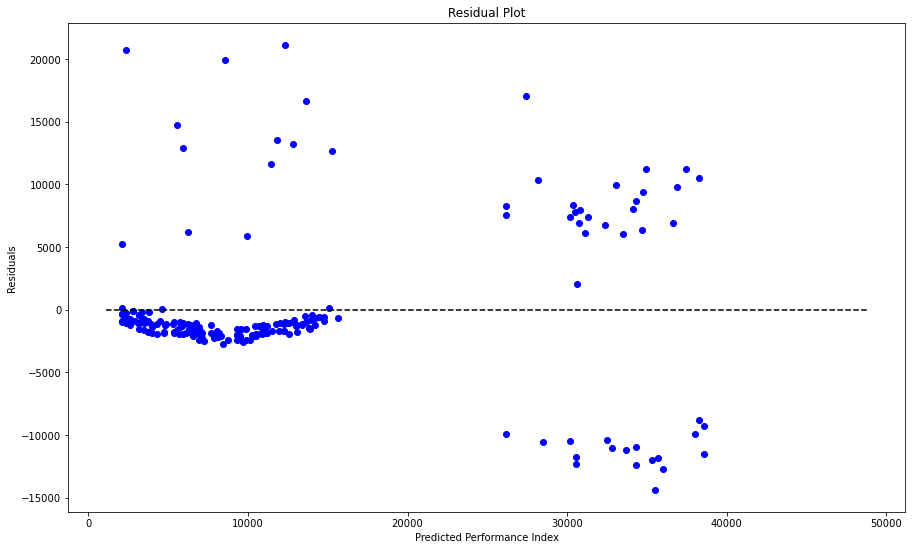

In [110]:
plt.figure(figsize=(15, 9))
plt.scatter(y_test_pred_simple, y_test - y_test_pred_simple, color='blue')
plt.hlines(y=0, xmin= y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


The model demonstrates strong performance for values below 16,000, accurately capturing underlying patterns. However, notable unexplained outliers emerge beyond this point, indicating potential limitations in the model's ability to predict higher values.

<h2>9. Build actual vs predicted charges plot and comment it.

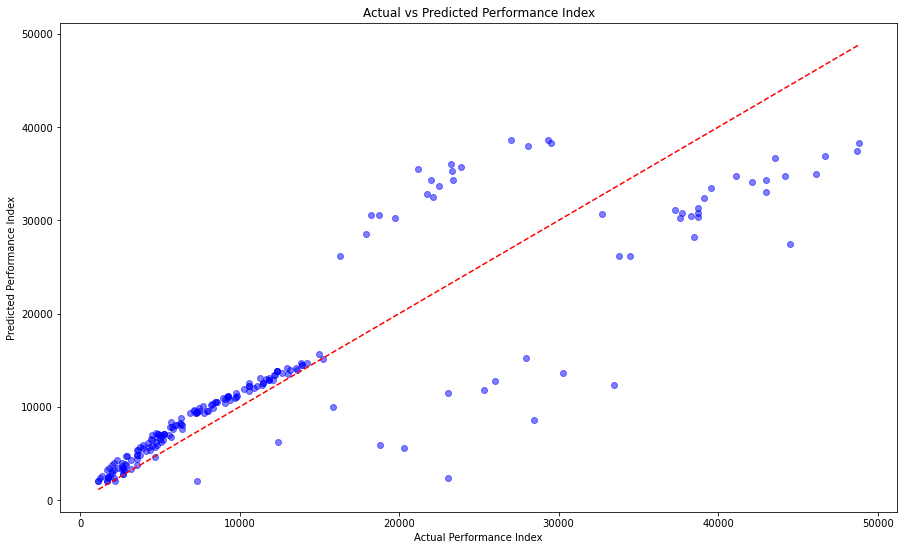

In [111]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 9))

# Plot the actual vs predicted values as a scatter plot
plt.scatter(y_test, y_test_pred_simple, color='blue', alpha=0.5)

# Generate a range of values from the minimum to maximum of actual values
line_coords = np.arange(y_test.min(), y_test.max())

# Plot a diagonal line representing perfect prediction
plt.plot(line_coords, line_coords, color='red', linestyle='--')

plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()

It's evident from the provided graph that the model performs effectively on values below 16,000, accurately capturing the underlying patterns. However, beyond this threshold, there are unexplained outliers where the model's predictions diverge significantly from actual values. These outliers might stem from complexities in the data that the model isn't adequately addressing. Further investigation is warranted to understand the nature of these outliers – whether they're due to data anomalies, model limitations, or other factors. 

<h2>10. Briefly explain what are degrees of freedom and dummy variables trap.

**Degrees of Freedom:** In statistics, degrees of freedom are the count of values that are free to vary in a calculation. In regression, it's the data points minus estimated parameters, indicating the available information for estimating model fit and variability. More degrees of freedom enhance statistical reliability.

**Dummy Variables Trap:** The dummy variable trap arises when using one-hot encoding for categorical variables in regression. It involves perfect multicollinearity, where one dummy variable can be predicted from others. To avoid this, one category's dummy variable is dropped, preventing redundant information and ensuring model stability. For example, in region encoding (North, South, West), you'd use only two dummy variables to circumvent the trap.